In [1]:
%pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [20]:
import sympy as sp
theta, k = sp.symbols('theta k', positive=True, real=True)

# 定义被求和的项
# term = k**4*(1-a)*a**(k-2) - 2*k**3*a**(k-1) + k**2*a**k/(1-a)
# term=k*(k+1)*a**(k-1)*(1-a)/2
term = sp.Rational(1, 4) * k**2 * (k + 1)**2 * theta**(k - 2) * (1 - theta)

# ① 直接做无穷求和
S = sp.summation(term, (k, 1, sp.oo))  # 自动识别
print(S)        # 输出 polylog(-5, a)

expr_closed = sp.simplify(sp.piecewise_fold(S))   # 或 factor(...)
print(expr_closed)  # 取 Piecewise 的第一支


-Piecewise((theta*(-theta - 1)/(theta - 1)**3, theta < 1), (Sum(k**2*theta**k, (k, 1, oo)), True))/(4*theta) - Piecewise((theta*(theta**2 + 4*theta + 1)/((1 - theta)**2*(theta**2 - 2*theta + 1)), theta < 1), (Sum(k**3*theta**k, (k, 1, oo)), True))/(2*theta) - Piecewise((theta*(-theta**3 - 11*theta**2 - 11*theta - 1)/((1 - theta)**2*(theta**3 - 3*theta**2 + 3*theta - 1)), theta < 1), (Sum(k**4*theta**k, (k, 1, oo)), True))/(4*theta) + Piecewise((theta*(-theta - 1)/(theta - 1)**3, theta < 1), (Sum(k**2*theta**k, (k, 1, oo)), True))/(4*theta**2) + Piecewise((theta*(theta**2 + 4*theta + 1)/((1 - theta)**2*(theta**2 - 2*theta + 1)), theta < 1), (Sum(k**3*theta**k, (k, 1, oo)), True))/(2*theta**2) + Piecewise((theta*(-theta**3 - 11*theta**2 - 11*theta - 1)/((1 - theta)**2*(theta**3 - 3*theta**2 + 3*theta - 1)), theta < 1), (Sum(k**4*theta**k, (k, 1, oo)), True))/(4*theta**2)
Piecewise(((theta**2 + 4*theta + 1)/(theta*(theta**4 - 4*theta**3 + 6*theta**2 - 4*theta + 1)), theta < 1), (Sum(k**2*

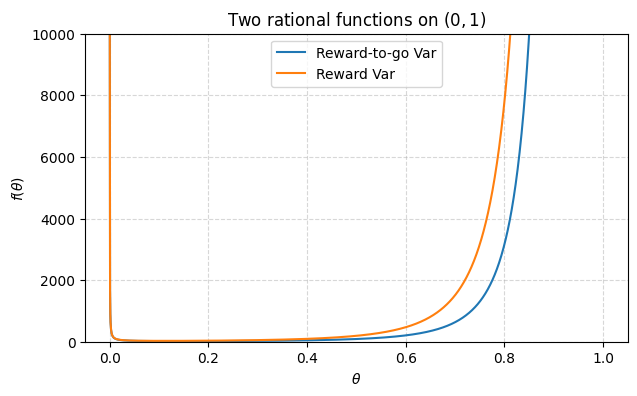

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# 定义符号表达式
θ = sp.symbols('θ', positive=True, real=True)
f1 = (θ**2 + 3*θ + 1) / (θ * (1-θ)**4)
f2 = (4*θ**2 + 8*θ + 1) / (θ * (1-θ)**4)

# 转成可数值计算的函数
f1_np = sp.lambdify(θ, f1, 'numpy')
f2_np = sp.lambdify(θ, f2, 'numpy')

# 采样点：避开 0 和 1
eps = 1e-4
x = np.linspace(eps, 1-eps, 2000)

plt.figure(figsize=(7,4))
plt.plot(x, f1_np(x), label=r'Reward-to-go Var')
plt.plot(x, f2_np(x), label=r'Reward Var')
plt.ylim(0, 1e4)            # 可按需要放宽/收紧 y 轴
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')
plt.title('Two rational functions on $(0,1)$')
plt.legend()
plt.grid(True, ls='--', alpha=0.5)
plt.show()